In [67]:
import pandas as pd

booking_growth = pd.read_csv("/Users/vijeethvj8/Downloads/Elevateme/OYO/booking_growth.csv")
cancellations = pd.read_csv("/Users/vijeethvj8/Downloads/Elevateme/OYO/cancellations.csv")
hotel_booking = pd.read_csv("/Users/vijeethvj8/Downloads/Elevateme/OYO/hotel_bookings.csv")

print(booking_growth.head(1))
print(cancellations.head(1))
print(hotel_booking.head(1))

       city booking_date  number_of_bookings
0  New York   2024-02-24                  17
  property_id booking_status
0         P17      confirmed
      city  room_price  number_of_nights
0  Houston         147                 3


In [69]:
print(booking_growth.isnull().sum())
print(cancellations.isnull().sum())
print(hotel_booking.isnull().sum())

city                  0
booking_date          0
number_of_bookings    0
dtype: int64
property_id       0
booking_status    0
dtype: int64
city                0
room_price          0
number_of_nights    0
dtype: int64


In [71]:
hotel_booking['revenue'] = hotel_booking['room_price'] * hotel_booking['number_of_nights']
print(hotel_booking.head())

      city  room_price  number_of_nights  revenue
0  Houston         147                 3      441
1    Miami         247                 7     1729
2  Chicago         444                 2      888
3    Miami         289                 2      578
4    Miami         193                 7     1351


In [73]:
revenue_per_city = hotel_booking.groupby('city')['revenue'].sum()
print(revenue_per_city)

city
Chicago        51467
Houston        62625
Los Angeles    43513
Miami          53663
New York       56076
Name: revenue, dtype: int64


In [75]:
# Ensure booking_date is datetime
booking_growth['booking_date'] = pd.to_datetime(booking_growth['booking_date'])

# Extract year-month
booking_growth['year_month'] = booking_growth['booking_date'].dt.to_period('M')

# Aggregate total bookings per city per month
monthly_bookings = (
    booking_growth
    .groupby(['city', 'year_month'])['number_of_bookings']
    .sum()
    .reset_index()
)

# Sort for proper shift
monthly_bookings = monthly_bookings.sort_values(['city', 'year_month'])

# Calculate month-over-month growth
monthly_bookings['prev_month_bookings'] = monthly_bookings.groupby('city')['number_of_bookings'].shift(1)
monthly_bookings['growth'] = monthly_bookings['number_of_bookings'] - monthly_bookings['prev_month_bookings']

# Drop first month (NaN growth)
monthly_bookings = monthly_bookings.dropna()

# Find the city with the highest MoM growth
max_growth_row = monthly_bookings.loc[monthly_bookings['growth'].idxmax()]

print("City with highest month-over-month growth:")
print(f"City: {max_growth_row['city']}, Month: {max_growth_row['year_month']}, Growth: {max_growth_row['growth']}")

City with highest month-over-month growth:
City: Houston, Month: 2024-06, Growth: 227.0


In [77]:
cancellation_rate = cancellations.groupby('property_id').agg(
        total_bookings=('booking_status', 'count'),
        cancelled_bookings=('booking_status', lambda x: (x == 'cancelled').sum())
    )

cancellation_rate['percentage'] = (cancellation_rate['cancelled_bookings']/cancellation_rate['total_bookings'] * 100).round(2)

print(cancellation_rate)

             total_bookings  cancelled_bookings  percentage
property_id                                                
P1                       14                   8       57.14
P10                      19                   5       26.32
P11                       7                   3       42.86
P12                      12                   4       33.33
P13                      16                   5       31.25
P14                      13                   3       23.08
P15                      11                   2       18.18
P16                      12                   2       16.67
P17                      14                   4       28.57
P18                      17                   4       23.53
P19                       9                   4       44.44
P2                       20                   4       20.00
P20                      18                   6       33.33
P3                       21                   5       23.81
P4                       20             

city
Houston        62625
New York       56076
Miami          53663
Chicago        51467
Los Angeles    43513
Name: revenue, dtype: int64


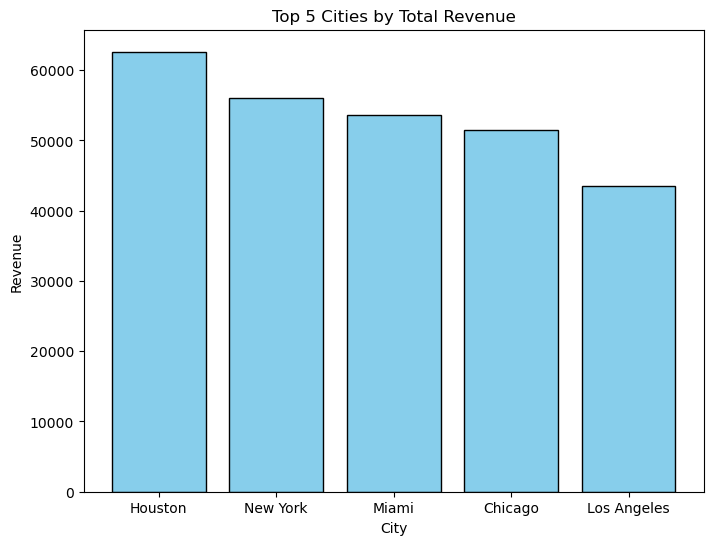

In [111]:
import matplotlib.pyplot as plt

top5_cities = revenue_per_city.sort_values(ascending=False).head(5)
print(top5_cities)


plt.figure(figsize=(8,6))
plt.bar(top5_cities.index, top5_cities.values, color="skyblue", edgecolor="black")
plt.title("Top 5 Cities by Total Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()